RMSE =  0.005971048630700872
R^2 =  0.9989785271377392
The result of integral: 0.32095235963086366
Lorenz coefficient =  0.642


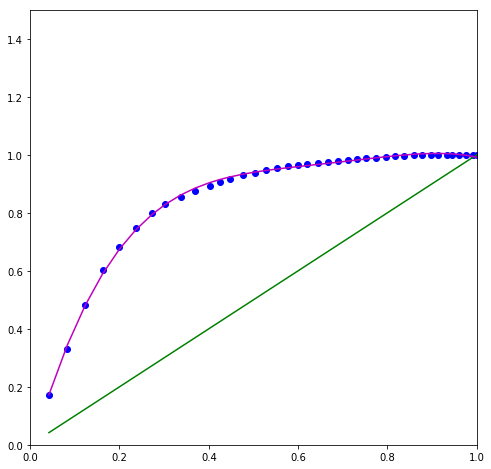

In [145]:
from matplotlib import pyplot as plt
from pylab import *
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

import scipy.integrate as integrate

# limit axis
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1.5)

#fraction of total flow capacity
Y = np.array([0.172, 0.33, 0.481, 0.604, 0.683, 0.747, 0.801, 0.831, 0.855, 0.876, 0.892, 0.906, 0.918, 0.93, 0.939, 0.947, 0.954, 0.96, 0.965, 0.969, 0.973, 0.976, 0.979, 0.983, 0.986, 0.988, 0.99, 0.992, 0.995, 0.996, 0.998, 0.999, 1, 1, 1, 1, 1, 1, 1, 1])
#fraction of total volume
X = np.array([0.042, 0.083, 0.123, 0.162, 0.2, 0.236, 0.273, 0.303, 0.337, 0.37, 0.403, 0.425, 0.448, 0.477, 0.504, 0.528, 0.553, 0.577, 0.599, 0.621, 0.645, 0.667, 0.689, 0.711, 0.733, 0.753, 0.774, 0.796, 0.818, 0.838, 0.859, 0.878, 0.898, 0.914, 0.933, 0.945, 0.96, 0.977, 0.993, 1 ])
plt.plot(x, y, 'bo')

#equality line
y_eq = x
plt.plot(x, y_eq, 'g')

# building Lorenz curve

# transforming the data to include another axis
x = X[:, np.newaxis]
y = Y[:, np.newaxis]
  
polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("RMSE = ", rmse)
print('R^2 = ', r2)

plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='m')

#function as argument to scipy integrate.quad using coef_ method
def f(x):
    i = len(model.coef_[0]) - 1
    eq = 0
    while(i > 0):
        eq += model.coef_[0][i] * x**i
        i = i - 1
    eq = eq + model.intercept_[0]
    eq = eq - x
    return eq
#calculate area ABCA, area ADCA = 0.5
result = integrate.quad(lambda x: f(x), 0, 1)
print("The result of integral:", result[0])
print("Lorenz coefficient = ", round(result[0] / 0.5, 3))